In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

#### Improting the Data

In [2]:
df = pd.read_csv('wisconsin_Breast_Cancer.csv')

In [3]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

2022-08-25 17:54:31.539375: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


#### Data Exploration and Understanding

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df = df.drop(['Unnamed: 32'], axis=1)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 32)

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Data Preprocessing 

In [9]:
df= df.rename(columns ={'diagnosis':"label"})

In [10]:
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df['label'].value_counts()

B    357
M    212
Name: label, dtype: int64

In [12]:
y = df['label'].values
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

#### Data Transformation

In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y)

In [27]:
print(len(Y))
print(Y.shape)
print(Y)

569
(569,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X = df.drop(labels=['label','id'], axis=1)
scaler.fit(X)
X = scaler.transform(X)

569

In [29]:
print(len(X))
print(X)
print(X.shape)

569
[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]
(569, 30)


#### Splitting the Data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[2].shape)

(426, 30)
(143, 30)
(426,)
(143,)
(30,)


## Model Building

#### Model without Dropput layers

In [30]:
model = Sequential()

model.add(Dense(128, input_dim=30, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64))

model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(32))

model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(16))

model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(8))

model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(4))

model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(1))


model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0

2022-08-25 17:46:22.573617: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-25 17:46:22.578559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-25 17:46:22.616825: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-08-25 17:46:22.616888: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mylinux
2022-08-25 17:46:22.616899: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mylinux
2022-08-25 17:46:22.617076: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-08-25 17:46:22.617121: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-08-25 17:46:22.617130: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310]

In [35]:
df.shape

(569, 32)

In [36]:
history = model.fit(X_train, y_train, verbose=1,
                    epochs=100, batch_size=64, validation_data=(X_test, y_test))

2022-08-25 17:46:44.970686: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-25 17:46:44.991333: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/100
7/7 [==============================] - 2s 140ms/step - loss: 0.6942 - accuracy: 0.5032 - val_loss: 0.6767 - val_accuracy: 0.8741
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6837 - accuracy: 0.6400 - val_loss: 0.6565 - val_accuracy: 0.9021
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6670 - accuracy: 0.7042 - val_loss: 0.6270 - val_accuracy: 0.8811
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6578 - accuracy: 0.6431 - val_loss: 0.5883 - val_accuracy: 0.9301
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6215 - accuracy: 0.7158 - val_loss: 0.5368 - val_accuracy: 0.9301
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5978 - accuracy: 0.7127 - val_loss: 0.4913 - val_accuracy: 0.9371
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5528 - accuracy: 0.7572 - val_loss: 0.4195 - val_accuracy: 0.9371
Epoch 8/100
7/7 [==

#### Plotting the Validation and Training losses

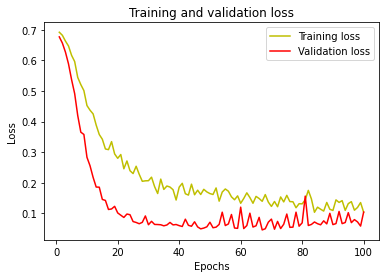

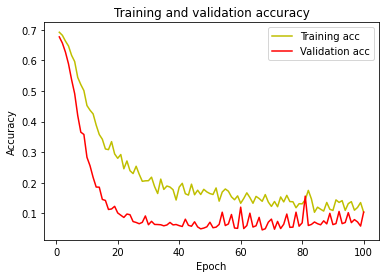

<AxesSubplot:>

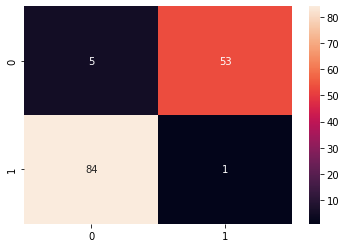

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'y' , label='Training loss')
plt.plot(epochs, val_loss, 'r' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, loss, 'y' , label='Training acc')
plt.plot(epochs, val_loss, 'r' , label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
y_pred = (y_pred < 0.5) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)


import seaborn as sns

sns.heatmap(cm, annot=True)

#### Model with Dropout layers

In [49]:
model = Sequential()

model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16))

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(8))

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))

model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               3968      
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_24 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_25 (Activation)   (None, 32)               

In [50]:
history = model.fit(X_train, y_train, verbose=1,
                    epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 2s 58ms/step - loss: 0.6902 - accuracy: 0.5722 - val_loss: 0.6748 - val_accuracy: 0.9371
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6804 - accuracy: 0.6718 - val_loss: 0.6463 - val_accuracy: 0.8252
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6711 - accuracy: 0.6603 - val_loss: 0.6195 - val_accuracy: 0.8392
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6565 - accuracy: 0.6966 - val_loss: 0.5955 - val_accuracy: 0.9441
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6348 - accuracy: 0.7356 - val_loss: 0.5491 - val_accuracy: 0.9021
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6068 - accuracy: 0.7396 - val_loss: 0.4987 - val_accuracy: 0.9441
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5763 - accuracy: 0.7733 - val_loss: 0.4406 - val_accuracy: 0.9510
Epoch 8/100
7/7 [===

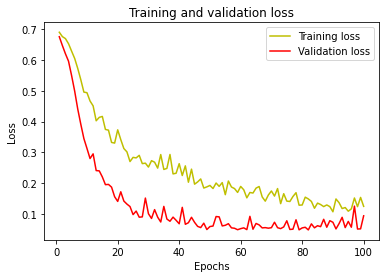

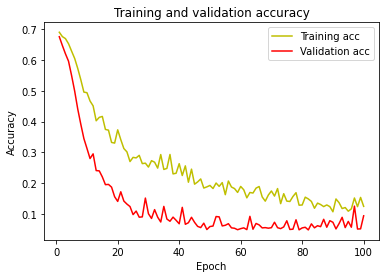

<AxesSubplot:>

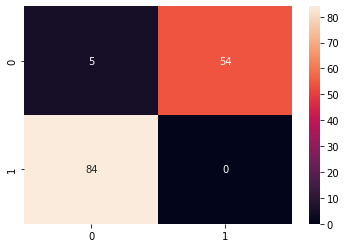

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'y' , label='Training loss')
plt.plot(epochs, val_loss, 'r' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, loss, 'y' , label='Training acc')
plt.plot(epochs, val_loss, 'r' , label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
y_pred = (y_pred < 0.5) 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)


import seaborn as sns

sns.heatmap(cm, annot=True)